## 🌟 Exercise 1: Calculating Required Sample Size

You are planning an A/B test to evaluate the impact of a new email subject line on the open rate. Based on past data, you expect a small effect size of 0.3 (an increase from 20% to 23% in the open rate). You aim for an 80% chance (power = 0.8) of detecting this effect if it exists, with a 5% significance level (α = 0.05).

- Calculate the required sample size per group using Python’s statsmodels library.
- What sample size is needed for each group to ensure your test is properly powered?




In [5]:

# !pip install statsmodels
import statsmodels.stats.power as smp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [2]:
# set the parameters
effect_size = 0.3
alpha = 0.05
power = 0.8
# a 50-50 split is typically the most efficient allocation for detecting differences between groups
ratio = 1.0 # both sample sizes the same (it's the default value anyway)

# calculate the required sample size
sample_size = smp.tt_ind_solve_power(effect_size=effect_size,
                                     alpha=alpha,
                                     power=power,
                                     ratio=ratio,
                                     alternative='two-sided'
                                     )
round_samp_size = int(np.ceil(sample_size))

# print the result
print(f"## Required sample size per group: {round_samp_size}")
print(f"## This means our total sample size should be {2 * round_samp_size} participants\
 ({round_samp_size} in the control group and {round_samp_size} in the treatment group)")

## Required sample size per group: 176
## This means our total sample size should be 352 participants (176 in the control group and 176 in the treatment group)


## 🌟 Exercise 2: Understanding the Relationship Between Effect Size and Sample Size

Using the same A/B test setup as in Exercise 1, you want to explore how changing the expected effect size impacts the required sample size.

- Calculate the required sample size for the following effect sizes: 0.2, 0.4, and 0.5, keeping the significance level and power the same.
- How does the sample size change as the effect size increases? Explain why this happens.


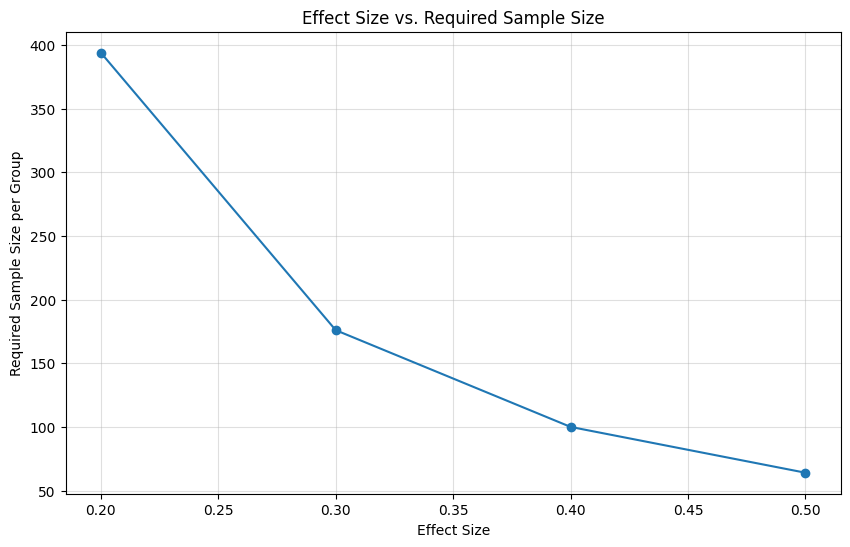

## Effect size: 0.2 -->	 required sample size per group: 394
## Effect size: 0.3 -->	 required sample size per group: 176
## Effect size: 0.4 -->	 required sample size per group: 100
## Effect size: 0.5 -->	 required sample size per group: 64


In [3]:
# set the constant parameters
alpha = 0.05
power = 0.8
ratio = 1.0

# define the effect sizes to test
effect_sizes = [0.2, 0.3, 0.4, 0.5]

# loop for each effect size
sample_sizes = []
for effect_size in effect_sizes:
    sample_size = smp.tt_ind_solve_power(effect_size=effect_size,
                                         alpha=alpha,
                                         power=power,
                                         ratio=ratio,
                                         alternative='two-sided')
    sample_sizes.append(int(np.ceil(sample_size)))

# plot it
plt.figure(figsize=(10, 6))
plt.plot(effect_sizes, sample_sizes, marker='o')
plt.title('Effect Size vs. Required Sample Size')
plt.xlabel('Effect Size')
plt.ylabel('Required Sample Size per Group')
plt.grid(True, alpha=0.4)
plt.show()

# print results
for effect_size, sample_size in zip(effect_sizes, sample_sizes):
    print(f"## Effect size: {effect_size} -->\t required sample size per group: {sample_size}")

There is an inverse relationship between sample size and effect size. This is due to several factors:

1. **Detectability**: Larger effect sizes are easier to detect statistically. When the difference between groups is more pronounced, we need fewer samples to confidently conclude that the difference is not due to chance.
2. **Signal-to-Noise Ratio**: Effect size can be thought of as the "signal" we're trying to detect amidst the "noise" of natural variation in the data. A larger effect size improves the signal-to-noise ratio, making it easier to distinguish the effect from random fluctuations.
3. **Statistical Power**: For a given power level (in this case, 0.8), we need fewer samples to detect a larger effect. This is because the probability of correctly rejecting the null hypothesis when it's false (which is what power measures) increases with effect size.
4. **Confidence Intervals**: Larger effect sizes lead to narrower confidence intervals relative to the size of the effect, which means we can be more certain about the true effect with fewer samples.
5. **Practical Significance**: As effect sizes increase, they become more practically significant and easier to detect, even with smaller sample sizes.

## 🌟 Exercise 3: Exploring the Impact of Statistical Power

Imagine you are conducting an A/B test where you expect a small effect size of 0.2. You initially plan for a power of 0.8 but wonder how increasing or decreasing the desired power level impacts the required sample size.

- Calculate the required sample size for power levels of 0.7, 0.8, and 0.9, keeping the effect size at 0.2 and significance level at 0.05.
- Question: How does the required sample size change with different levels of statistical power? Why is this understanding important when designing A/B tests?


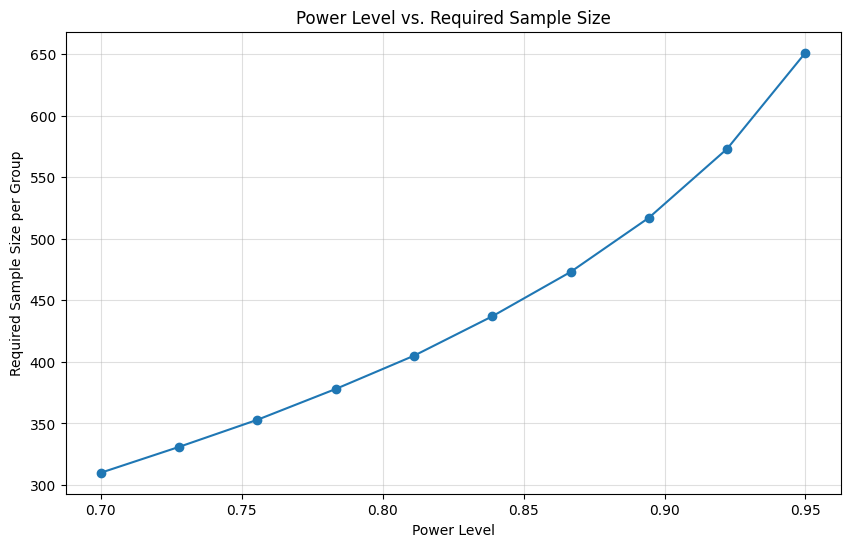

## Power level: 0.70 -->	 required sample size per group: 310
## Power level: 0.73 -->	 required sample size per group: 331
## Power level: 0.76 -->	 required sample size per group: 353
## Power level: 0.78 -->	 required sample size per group: 378
## Power level: 0.81 -->	 required sample size per group: 405
## Power level: 0.84 -->	 required sample size per group: 437
## Power level: 0.87 -->	 required sample size per group: 473
## Power level: 0.89 -->	 required sample size per group: 517
## Power level: 0.92 -->	 required sample size per group: 573
## Power level: 0.95 -->	 required sample size per group: 651


In [4]:
# set constant parameters
effect_size = 0.2
alpha = 0.05
ratio = 1.

# power levels to test
# power_levels = [.7, .8, .9]
power_levels = np.linspace(.7, .95, 10)

# loop for each power level
sample_sizes = []
for power_level in power_levels:
    sample_size = smp.tt_ind_solve_power(effect_size=effect_size,
                                         alpha=alpha,
                                         power=power_level,
                                         ratio=ratio,
                                         alternative='two-sided')
    sample_sizes.append(int(np.ceil(sample_size)))

# plot it
plt.figure(figsize=(10, 6))
plt.plot(power_levels, sample_sizes, marker='o')
plt.title('Power Level vs. Required Sample Size')
plt.xlabel('Power Level')
plt.ylabel('Required Sample Size per Group')
plt.grid(True, alpha=0.4)
plt.show()

# print results
for power_level, sample_size in zip(power_levels, sample_sizes):
    print(f"## Power level: {power_level:.2f} -->\t required sample size per group: {sample_size}")

As the desired power level increases, the required sample size also increases (exponentially?).

Understanding the relationship between statistical power and sample size is crucial when designing A/B tests for several reasons:

1. **Resource Allocation**: Higher power requires larger sample sizes, which often translates to more time, effort, and potentially cost in running the test. This understanding helps in allocating resources effectively.
2. **Balancing Precision and Practicality**: While higher power provides more reliable results, it comes at the cost of larger sample sizes. Designers must balance the desire for precision with practical constraints.
3. **Risk Management**: Choosing the appropriate power level helps manage the risks of false negatives (Type II errors) in your tests. Higher power reduces the risk of missing important effects but requires more resources.
4. **Test Duration**: In many A/B tests, sample size directly affects the duration of the test. Understanding this relationship helps in planning realistic timelines for experiments.
5. **Minimum Detectable Effect**: For a given sample size and significance level, increasing power reduces the minimum detectable effect size. This is important when deciding what effect sizes are practically significant for your business.
6. **Cost-Benefit Analysis**: By understanding how power affects sample size, you can perform better cost-benefit analyses of your A/B tests, weighing the costs of larger samples against the benefits of more reliable results.
7. **Iterative Testing**: In some cases, it might be more efficient to run multiple tests with lower power rather than one large test with very high power. This understanding informs such strategic decisions.
8. **Communicating Expectations**: When presenting A/B test plans to stakeholders, understanding this relationship helps in setting realistic expectations about test duration, resource requirements, and the reliability of results.

## 🌟 Exercise 4: Implementing Sequential Testing

You are running an A/B test on two versions of a product page to increase the purchase rate. You plan to monitor the results weekly and stop the test early if one version shows a significant improvement.

- Define your stopping criteria.
- Decide how you would implement sequential testing in this scenario.
- At the end of week three, Version B has a p-value of 0.02. What would you do next?


* **Define your stopping criteria**:
  1. **statistical significance**: Stop the test if the p value reacheas a predefined threshold (commonly 0.05, or more conservative to 0.01).
  2. **minimum sample size**: To ensure we don't stop too early based on random fluctuations, we can set a minimum sample size before considering stopping. Say at least 1k visitors.
  3. **max duration**: To prevent the test from running indefinetly, we can set a max duration of 8 weeks.
  4. **practical significance**: We can also consider the effect size. Say we need to see at least a 5% relaitve improvement in the purchase rate before stopping the test early.

* **Decide how you would implement sequential testing in this scenario**:
  1. Set up the A/B test infraestructure to randomly assign visitors to either version A (control) or v. B (treatment) of the product page.
  2. Implement a data collection system that records purchase events and associates them with the correct variant
  3. Create aweekly automated report that calculates:
      * current sample size of each variant
      * purchase rate of each variant
      * relative difference in purchase rates
      * p-value for the difference between variants
  4. Each week review the report and check if the stopping criteria applies
  5. Use a multiple testing correction method, such as O'Brien-Fleming boundaries, to adjust the significance thresholds over time. This helps control the overal **Type I error** rate when making multiple comparisons.

* **At the end of week three, Version B has a p-value of 0.02. What would you do next?**:
  1. **Check stopping criteria**: If any of the stopping criteria conditions was met, we stop the test. If not met, we continue :-)
  2. **Analyse trends**: Check for example how p-value has changed over the three weeks. Is there a consistent trend, or is this week an outlier?
  3. **Prepare for a potential stopping**: If the trend continues, we might meet our stopping criteria next week. Start preparing a team for a potential decision.
  4. **Consider practical factors**: Are there any upcoming events or changes that might affect the test result? If so, we might want to extend the duration
  5. **Update stakeholders**

## 🌟 Exercise 5: Applying Bayesian A/B Testing

You’re testing a new feature in your app, and you want to use a Bayesian approach. Initially, you believe the new feature has a 50% chance of improving user engagement. After collecting data, your analysis suggests a 65% probability that the new feature is better.

- Describe how you would set up your prior belief.
- After collecting data, how does the updated belief (posterior distribution) influence your decision?
- What would you do if the posterior probability was only 55%?


**Ans**

* **Setting Up the Prior Belief**

    In Bayesian statistics, the prior belief represents our initial understanding before collecting new data. For this scenario:

    1. **Prior Probability**: We believe there's a 50% chance the new feature improves user engagement.
    2. **Beta Distribution**: We can model this belief using a Beta distribution, which is suitable for representing probabilities.
    3. **Parameters**: Let's use Beta(10, 10) as our prior. This distribution has a mean of 0.5 (matching our 50% belief) and represents moderate certainty in our prior.
        - The parameters (10, 10) indicate we have some confidence in our prior, equivalent to having observed 20 total events.
        - This allows for meaningful updating with new data while not being too rigid.
    4. **Visualization**:

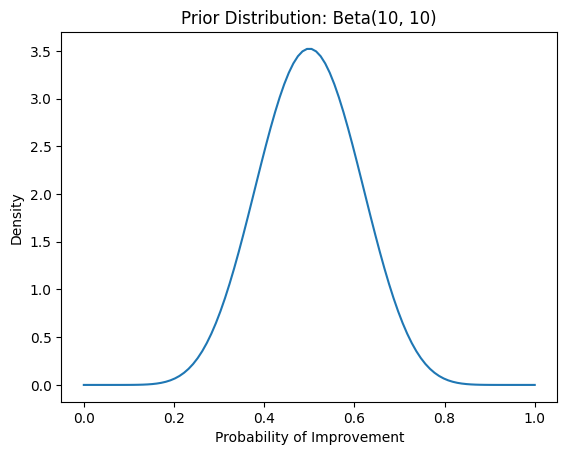

In [6]:
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, 10, 10))
plt.title("Prior Distribution: Beta(10, 10)")
plt.xlabel("Probability of Improvement")
plt.ylabel("Density")
plt.show()

* **Updating Belief and Decision Making**

    After collecting data, our analysis suggests a 65% probability that the new feature is better. This updated belief is our posterior distribution.

    1. **Posterior Distribution**: The exact shape would depend on the amount of data collected, but it would be shifted towards higher probabilities compared to our prior.
    2. **Interpretation**: A 65% probability suggests moderate evidence in favor of the new feature.
    3. **Decision Influence**:
        - This updated belief increases our confidence that the new feature is beneficial.
        - It's not overwhelmingly strong evidence, but it's more positive than our initial 50% belief.
    4. **Action Steps**:
        - Consider implementing the new feature, especially if the cost of implementation is low.
        - If possible, continue collecting data to further refine our belief.
        - Analyze the magnitude of improvement, not just the probability of being better.
        - Look at secondary metrics to ensure there are no negative side effects.
    5. **Communication**: Present the results as "Based on our data, there's a 65% chance the new feature improves user engagement, up from our initial estimate of 50%."

* **Scenario with 55% Posterior Probability**
    If the posterior probability was only 55%, our approach would be more cautious:

    1. **Interpretation**: This represents only a slight increase from our prior belief of 50%.
    2. **Statistical Significance**: In frequentist terms, this would likely not be statistically significant.
    3. **Actions**:
        - Do not implement the feature based solely on this data.
        - Extend the testing period to collect more data, if possible.
        - Investigate why the improvement is minimal. Are there subgroups of users who benefit more?
        - Consider A/A testing to validate our experimental setup.
    4. **Decision Framework**: Establish a clear decision framework, e.g.:
        - Below 60%: Don't implement, collect more data
        - 60-70%: Implement if low cost, continue monitoring
        - Above 70%: Implement with confidence
    5. **Cost-Benefit Analysis**: Even a small improvement might be worth implementing if the cost is very low and there are no negative impacts.
    6. **Iteration**: Use these results to inform the design of an improved version of the feature.
    7. **Communication**: Report as "Our data suggests a 55% chance of improvement, which is only slightly better than our initial expectation. We need more evidence before making a decision."

# 🌟 Exercise 6: Implementing Adaptive Experimentation

You’re running a test with three different website layouts to increase user engagement. Initially, each layout gets 33% of the traffic. After the first week, Layout C shows higher engagement.

- Explain how you would adjust the traffic allocation after the first week.
- Describe how you would continue to adapt the experiment in the following weeks.
- What challenges might you face with adaptive experimentation, and how would you address them?


* **Adjusting Traffic Allocation After Week One**:

    Given that Layout C shows higher engagement after the first week:

    1. Increase traffic to Layout C: Allocate a larger portion of traffic, say 50%, to Layout C.
    2. Reduce traffic to Layouts A and B: Allocate the remaining traffic equally between A and B, giving each 25%.

    This adjustment allows us to capitalize on the promising performance of Layout C while still gathering data on the other layouts. 

* **Continuing Adaptation in Following Weeks**:

    1. Weekly reassessment: Analyze engagement metrics for each layout on a weekly basis.
    2. Dynamic reallocation:
        - Increase traffic to layouts showing improvement.
        - Decrease traffic to underperforming layouts.
    3. Maintain a minimum traffic allocation (e.g., 10%) to each layout for ongoing evaluation.
    4. Use Bayesian methods: Continuously update our beliefs about each layout's performance.
    5. Define stopping criteria: Establish clear conditions for ending the experiment, such as reaching a certain confidence level or maximum duration.

* **Challenges and Solutions**:

    1. Reduced statistical power:
        - Challenge: Unequal traffic allocation can diminish the power of traditional statistical tests.
        - Solution: Employ Bayesian methods or adaptive statistical techniques [designed for unequal sample sizes](https://gp-seminar-series.github.io/neurips-2022/assets/camera_ready/38.pdf)

    2. Premature convergence:
        - Challenge: The algorithm might allocate too much traffic to an initially promising layout, missing potential improvements in others.
        - Solution: Implement [exploration sampling](https://voxdev.org/topic/methods-measurement/adaptive-experiments-policy-research) to maintain some traffic to all variants throughout the experiment
        
    3. Time-varying performance:
        - Challenge: Layout performance may change over time due to external factors.
        - Solution: Use time-weighted metrics and consider recent performance more heavily in allocation decisions.

    4. Operational complexity:
        - Challenge: Frequent reallocation can be operationally challenging.
        - Solution: Limit reallocation to weekly or bi-weekly intervals to balance adaptivity with operational feasibility.

    5. Interpretation difficulties:
        - Challenge: Adaptive allocation can make traditional A/B test interpretation challenging.
        - Solution: Focus on cumulative performance metrics and use [simulation-based inference methods](https://voxdev.org/topic/methods-measurement/adaptive-experiments-policy-research) for final analysis